In [ ]:
# How does the transmission from a uniform not point source to an iris located at a distance L 
# change as a function of iris radius ?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
numPoints = 1000000 # Number of points in MC
R = 1.5/2 # Diameter of a non-point source
L = 108.8 # Distance from source to Iris 
angleCut = 0.015 # Additional angle cut in transmission

In [43]:
# Transmission as a function iris radius

trans = []
for k in range(1, 40):
    rIris = 10*k/40
    
    rAtIris = []
    for i in range(numPoints):
        
        # Generating distribution on non-point source
        r = R*np.sqrt(np.random.uniform())  
        theta = np.random.uniform(0, 2*np.pi) 
        X = r*np.cos(theta) 
        Y = r*np.sin(theta)

        # Generating phi and theta of emission from the source
        theta = np.random.uniform(0, 2*np.pi) 
        phi = np.arccos(2*np.random.uniform() - 1) 
        
        # Applying angle cut
        if phi < angleCut or phi > np.pi - angleCut:
    
            # Calculating transversal position is within iris at position L
            rSource_Iris = L/np.abs(np.cos(phi)) 
    
            XX = X + rSource_Iris*np.sin(phi)*np.cos(theta) 
            YY = Y + rSource_Iris*np.sin(phi)*np.sin(theta) 
            rTemp = np.sqrt( XX*XX + YY*YY )
            if rTemp < rIris :  # if it is add it
                rAtIris.append(rTemp)
            
    trans.append(len(rAtIris))

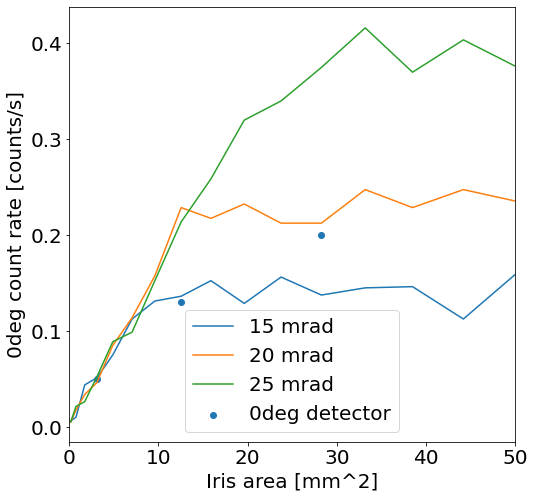

In [45]:
plt.figure(figsize=(8, 8))
plt.rc('font', size=20) #controls default text size

norm = 800

dataX = [np.pi*1, np.pi*4, np.pi*9]
dataY = [0.05, 0.13, 0.20]
trans15 = [trans15[i]/norm for i in range(len(trans15))]
trans20 = [trans20[i]/norm for i in range(len(trans20))]
trans25 = [trans25[i]/norm for i in range(len(trans25))]

X = [np.pi*(10*k/40)**2 for k in range(1,40)]
plt.plot(X, trans15, label = '15 mrad')
plt.plot(X, trans20, label = '20 mrad')
plt.plot(X, trans25, label = '25 mrad')
plt.scatter(dataX, dataY, label = '0deg detector')
plt.xlabel('Iris area [mm^2]')
plt.ylabel('0deg count rate [counts/s]')
plt.xlim([0, 50])
plt.legend()
plt.show()

In [17]:
# Angle histogram for particles passing through the iris 

numPoints = 10000000 # Number of points in MC
rIris = 3
angleCut = 0.05 # Additional angle cut in transmission

phiAccepted = []
for i in range(numPoints):
        
    # Generating distribution on non-point source
    r = R*np.sqrt(np.random.uniform())  
    theta = np.random.uniform(0, 2*np.pi) 
    X = r*np.cos(theta) 
    Y = r*np.sin(theta)

    # Generating phi and theta of emission from the source
    theta = np.random.uniform(0, 2*np.pi) 
    phi = np.arccos(2*np.random.uniform() - 1) 
        
    # Applying angle cut
    if phi < angleCut: #or phi > np.pi - angleCut:
    
        # Calculating transversal position is within iris at position L
        rSource_Iris = L/np.abs(np.cos(phi)) 
    
        XX = X + rSource_Iris*np.sin(phi)*np.cos(theta) 
        YY = Y + rSource_Iris*np.sin(phi)*np.sin(theta) 
        rTemp = np.sqrt( XX*XX + YY*YY )
        if rTemp < rIris :  # if it is add it
            phiAccepted.append(phi)
            

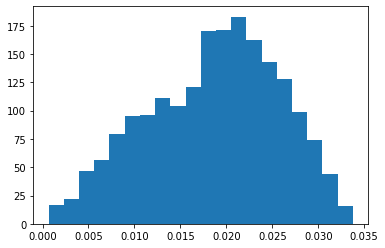

In [18]:
plt.hist(phiAccepted, bins = 20)
plt.show()